# Handling categorical features

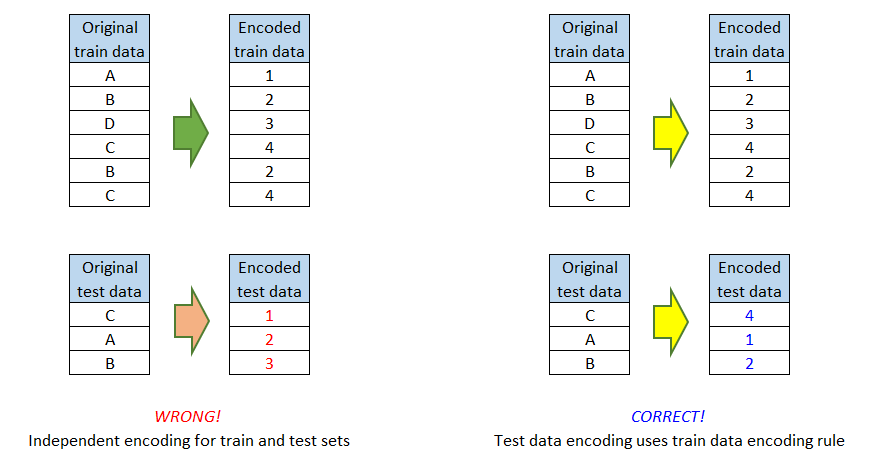

If you perform the encoding before the split, it will lead to data leakage (train-test contamination) In the sense, you will introduce new data (integers of Label Encoders) and use it for your models thus it will affect the end predictions results (good validation scores but poor in deployment)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### one hot encoding

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# lets take sex feature to begin with


In [6]:
sex=df["sex"]

In [8]:
pd.get_dummies(sex,drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


By default, this is set to drop_first = False . This will cause get_dummies to create one dummy variable for every level of the input categorical variable. If you set drop_first = True , then it will drop the first category. So if you have K categories, it will only produce K – 1 dummy variables.

In [10]:
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
# have to first fill this missing values or we can drop it for the time being/

In [11]:
embarked=df["embarked"].dropna()

In [12]:
embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [14]:
pd.get_dummies(embarked,drop_first=False).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [15]:
pd.get_dummies(embarked,drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


##### main issues with using one-hot encoding

Because this procedure generates several new variables, it is prone to causing a large problem (too many predictors) if the original column has a large number of unique values. Another disadvantage of one-hot encoding is that it produces multicollinearity among the various variables, lowering the model's accuracy.

##### one hot encoding with many categories in a features

In [16]:
df=pd.read_csv(r"D:\full_stack\MyPractice\eda-fe\encoding\mercedes-benz-greener-manufacturing\train.csv\train.csv")

In [17]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# taking some features just for this

In [22]:
df=pd.read_csv(r'D:\full_stack\MyPractice\eda-fe\encoding\mercedes-benz-greener-manufacturing\train.csv\train.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [26]:
df.isna().sum()
# no missing value

X0    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [28]:
df.describe()

,X0,X1,X2,X3,X4,X5,X6
count,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12
top,z,aa,as,c,d,w,g
freq,360,833,1659,1942,4205,231,1042


In [ ]:
# X0,X1,X2,X5 have  47 ,27  ,44 ,29  features respectively 
# unsing onehot encoding is not a solution as it will increae the number of features in the dataset

In [32]:
for i in df.columns:
    print("feature --->",i)
    print(df[i].unique())

feature ---> X0
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
feature ---> X1
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
feature ---> X2
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
feature ---> X3
['a' 'e' 'c' 'f' 'd' 'b' 'g']
feature ---> X4
['d' 'b' 'c' 'a']
feature ---> X5
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
feature ---> X6
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']


 soution :-
        
kdd cup orange challenge with ensemble selection

1. taking 10 most frequent categories in each and every features and on for those 10 features we aplly one hot encoding and skipping rest of the features (drop) 


In [36]:
df.X0.value_counts().sort_values(ascending=False).head(10)

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
Name: X0, dtype: int64

In [37]:
# how to do it

In [38]:
df.X0.value_counts().sort_values(ascending=False).head(10).index

Index(['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], dtype='object')

In [40]:
list_10=df.X0.value_counts().sort_values(ascending=False).head(10).index
list_10=list(list_10)
list_10
# we are going to apply one hot encoding for the below features and rest we are going to skip them

['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']

In [43]:
for categories in list_10:
    df[categories]=np.where(df["X0"]==categories,1,0)

In [46]:
df[list_10].head(10)

,z,ak,y,ay,t,x,o,f,n,w
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0


In [47]:
list_10.append("X0")

In [53]:
df[list_10].head(20)

,z,ak,y,ay,t,x,o,f,n,w,X0
0,0,0,0,0,0,0,0,0,0,0,k
1,0,0,0,0,0,0,0,0,0,0,k
2,0,0,0,0,0,0,0,0,0,0,az
3,0,0,0,0,0,0,0,0,0,0,az
4,0,0,0,0,0,0,0,0,0,0,az
5,0,0,0,0,1,0,0,0,0,0,t
6,0,0,0,0,0,0,0,0,0,0,al
7,0,0,0,0,0,0,1,0,0,0,o
8,0,0,0,0,0,0,0,0,0,1,w
9,0,0,0,0,0,0,0,0,0,0,j


### ordinal number encoding

This type of encoding is used when the variables in the data are ordinal, ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels.

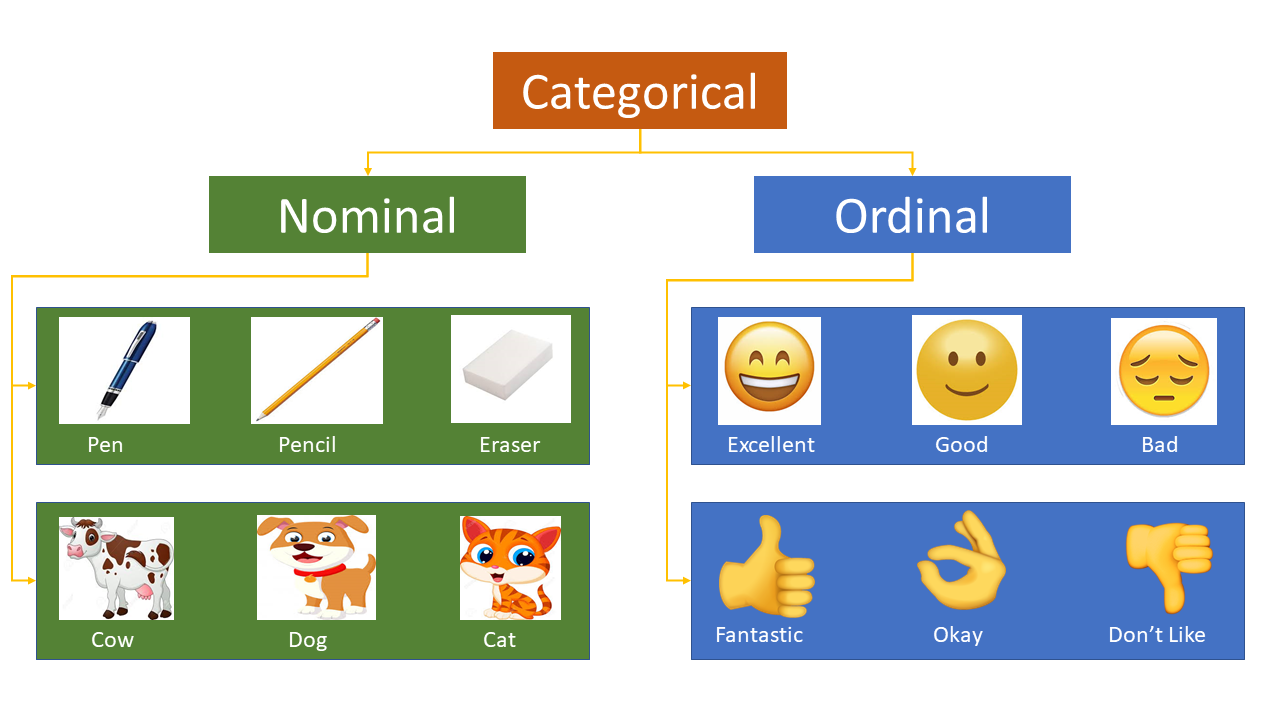

more ordinal categories

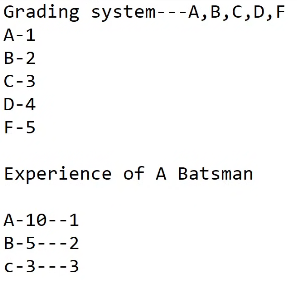

In [54]:
import datetime

In [57]:
today_date=datetime.datetime.today()

In [58]:
today_date

datetime.datetime(2022, 10, 13, 16, 41, 9, 635850)

In [59]:
#creating 15 days data

In [63]:
today_date-datetime.timedelta(1)
#difference of one day

datetime.datetime(2022, 10, 12, 16, 41, 9, 635850)

In [65]:
### list comprehension
[today_date-datetime.timedelta(x) for x in range(0,13)]

[datetime.datetime(2022, 10, 13, 16, 41, 9, 635850),
 datetime.datetime(2022, 10, 12, 16, 41, 9, 635850),
 datetime.datetime(2022, 10, 11, 16, 41, 9, 635850),
 datetime.datetime(2022, 10, 10, 16, 41, 9, 635850),
 datetime.datetime(2022, 10, 9, 16, 41, 9, 635850),
 datetime.datetime(2022, 10, 8, 16, 41, 9, 635850),
 datetime.datetime(2022, 10, 7, 16, 41, 9, 635850),
 datetime.datetime(2022, 10, 6, 16, 41, 9, 635850),
 datetime.datetime(2022, 10, 5, 16, 41, 9, 635850),
 datetime.datetime(2022, 10, 4, 16, 41, 9, 635850),
 datetime.datetime(2022, 10, 3, 16, 41, 9, 635850),
 datetime.datetime(2022, 10, 2, 16, 41, 9, 635850),
 datetime.datetime(2022, 10, 1, 16, 41, 9, 635850)]

In [67]:
days=[today_date-datetime.timedelta(x) for x in range(0,13)]

In [70]:
data=pd.DataFrame(days)
data.columns=["days"]

In [77]:
data.head()

,days
0,2022-10-13 16:41:09.635850
1,2022-10-12 16:41:09.635850
2,2022-10-11 16:41:09.635850
3,2022-10-10 16:41:09.635850
4,2022-10-09 16:41:09.635850


In [86]:
# retrive days related info
data["days"].dt.day_name()

0      Thursday
1     Wednesday
2       Tuesday
3        Monday
4        Sunday
5      Saturday
6        Friday
7      Thursday
8     Wednesday
9       Tuesday
10       Monday
11       Sunday
12     Saturday
Name: days, dtype: object

In [92]:
data["weekday"]=data["days"].dt.day_name()

In [94]:
data.head()

,days,weekday
0,2022-10-13 16:41:09.635850,Thursday
1,2022-10-12 16:41:09.635850,Wednesday
2,2022-10-11 16:41:09.635850,Tuesday
3,2022-10-10 16:41:09.635850,Monday
4,2022-10-09 16:41:09.635850,Sunday


In [95]:
dictionary={
    'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7
             }

In [96]:
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [100]:
data["weekday_ordinal"]=data["weekday"].map(dictionary)

In [101]:
data

,days,weekday,weekday_ordinal
0,2022-10-13 16:41:09.635850,Thursday,4
1,2022-10-12 16:41:09.635850,Wednesday,3
2,2022-10-11 16:41:09.635850,Tuesday,2
3,2022-10-10 16:41:09.635850,Monday,1
4,2022-10-09 16:41:09.635850,Sunday,7
5,2022-10-08 16:41:09.635850,Saturday,6
6,2022-10-07 16:41:09.635850,Friday,5
7,2022-10-06 16:41:09.635850,Thursday,4
8,2022-10-05 16:41:09.635850,Wednesday,3
9,2022-10-04 16:41:09.635850,Tuesday,2


# count of Frequency Encoding

In [102]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [104]:
train_set[1].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [105]:
# we are going to find the cound of these categories

In [106]:
columns=[1,3,5,6,7,8,9,13] # taking the categorical features

In [110]:
train_set=train_set[columns]

In [111]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [112]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [117]:
for i in train_set.columns:
    print("feature --->",i,len(train_set[i].unique()),"  lables")
    

feature ---> Employment 9   lables
feature ---> Degree 16   lables
feature ---> Status 7   lables
feature ---> Designation 15   lables
feature ---> family_job 6   lables
feature ---> Race 5   lables
feature ---> Sex 2   lables
feature ---> Country 42   lables


In [128]:
# country feature is having more  categories so we will use count of Frequency Encoding technique

In [120]:
train_set["Country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [121]:
# ? is 583  and is  so we can do some kind of impution or drop it

In [122]:
train_set["Country"].value_counts().to_dict()

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [123]:
# here we are replacing the categorical features with ther frequency

In [124]:
country_map=train_set["Country"].value_counts().to_dict()

In [125]:
train_set["Country"]=train_set["Country"].map(country_map)

In [126]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


##### Advantages

Easy To Use

Not increasing feature space 

##### Disadvantages
It will provide same weight if the frequencies are same

### Target Guided Ordinal Encoding
Ordering the labels according to the target

Replace the labels by the joint probability of being 1 or 0

In [200]:
df=sns.load_dataset('titanic')

In [201]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [202]:
df=df[["deck","survived"]]

In [203]:
df.head()

,deck,survived
0,NaN,0
1,C,1
2,NaN,1
3,C,1
4,NaN,0


In [204]:
# first we fill the nan values wih 'missing'

In [205]:
df["deck"]=np.where(df["deck"].isna(),"Missing",df["deck"])

In [206]:
df.head()

,deck,survived
0,Missing,0
1,C,1
2,Missing,1
3,C,1
4,Missing,0


In [207]:
df["deck"]=df["deck"].astype(str).str[0]

In [208]:
df.deck.value_counts()

M    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

In [209]:
df.groupby(["deck"])["survived"].mean() # we grouping the categories based on the labels
# i.e base on the output features we are findig the freq

deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299419
Name: survived, dtype: float64

In [210]:
# misiing category have very less chance to survive

In [211]:
df.groupby(["deck"])["survived"].mean().sort_values().index

Index(['M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='deck')

In [212]:
ordinal_lables=df.groupby(["deck"])["survived"].mean().sort_values().index

In [213]:
# now we will map these ordinal_lables to a number

In [214]:
{k:i for i, k in enumerate(ordinal_lables,0)}

{'M': 0, 'A': 1, 'G': 2, 'C': 3, 'F': 4, 'B': 5, 'E': 6, 'D': 7}

In [215]:
ordinal_labels2={k:i for i, k in enumerate(ordinal_lables,0)}

In [216]:
ordinal_labels2

{'M': 0, 'A': 1, 'G': 2, 'C': 3, 'F': 4, 'B': 5, 'E': 6, 'D': 7}

In [217]:
df["deck_encoded"]=df["deck"].map(ordinal_labels2)

In [218]:
df.head()

,deck,survived,deck_encoded
0,M,0,0
1,C,1,3
2,M,1,0
3,C,1,3
4,M,0,0


### Mean encoding



In [219]:
df.groupby(["deck"])["survived"].mean()

deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299419
Name: survived, dtype: float64

In [220]:
mean_ordinal=df.groupby(["deck"])["survived"].mean()

In [221]:
df["mean_ordinal_encoded"]=df["deck"].map(mean_ordinal)

In [222]:
df.head()

,deck,survived,deck_encoded,mean_ordinal_encoded
0,M,0,0,0.299419
1,C,1,3,0.593220
2,M,1,0,0.299419
3,C,1,3,0.593220
4,M,0,0,0.299419


### advantage
1. It capure information witin the lables. there for rendering more predictive features
2. it created a  monoonic relationship between variable and target

### disadvantage 
3. prone to overfitting

# Probability Ratio Encoding

Probability of Survived based on Cabin--- Categorical Feature

Probability of Not Survived---1-pr(Survived)

pr(Survived)/pr(Not Survived)

Dictonary to map cabin with probability

replace with the categorical feature

In [223]:
df=sns.load_dataset('titanic')

In [224]:
df=df[["deck","survived"]]

In [225]:
df.head()

,deck,survived
0,NaN,0
1,C,1
2,NaN,1
3,C,1
4,NaN,0


In [226]:
# firts we fix these nan values tehn we apply Probability Ratio Encoding

In [229]:
 
  df["deck"] = np.where(df["deck"].isna(),"Missing",df["deck"])

In [230]:
df.head()

,deck,survived
0,Missing,0
1,C,1
2,Missing,1
3,C,1
4,Missing,0


In [232]:
df["deck"].unique()

array(['Missing', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [233]:
df["deck"]=df["deck"].astype(str).str[0]

In [234]:
df.head()

,deck,survived
0,M,0
1,C,1
2,M,1
3,C,1
4,M,0


In [235]:
df["deck"].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [236]:
# now we will perform Probability Ratio Encoding

In [238]:
df.groupby(['deck'])['survived'].mean()

deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299419
Name: survived, dtype: float64

In [239]:
prob=df.groupby(['deck'])['survived'].mean()

In [240]:
prob_df=pd.DataFrame(prob)

In [241]:
prob_df

,survived
deck,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299419


In [242]:
prob_df["died"]=1-prob_df["survived"]

In [243]:
prob_df

,survived,died
deck,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299419,0.700581


In [244]:
# now we find the probability ratio

In [245]:
prob_df["Probability_ratio"]=prob_df["survived"]/prob_df["died"]

In [246]:
prob_df

,survived,died,Probability_ratio
deck,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299419,0.700581,0.427386


In [247]:
# now we will replace this probability ratio  

In [249]:
prob_map=prob_df["Probability_ratio"].to_dict()

In [250]:
df["Probability Ratio Encoding"]=df["deck"].map(prob_map)

In [253]:
df.head()

,deck,survived,Probability Ratio Encoding
0,M,0,0.427386
1,C,1,1.458333
2,M,1,0.427386
3,C,1,1.458333
4,M,0,0.427386
